<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [2]:
!pip install scikit-learn

In [3]:
! mkdir ~/.kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 44.8MB/s]


In [6]:
! unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Импортируйте необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Загрузите свои данные
df = pd.read_csv('ds_salaries.csv')

# ... (rest of your code)

# Specify the numerical features for outlier detection
numeric_features = df.select_dtypes(include=[np.number]).columns

# Create an Isolation Forest model for outlier detection
model = IsolationForest(contamination=0.1)  # Adjust the contamination parameter based on your dataset

# Fit the model and predict outliers
df['outlier'] = model.fit_predict(df[numeric_features])

# Print the outliers
print(df[df['outlier'] == -1])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


      work_year experience_level employment_type                  job_title  \
2          2023               MI              CT                ML Engineer   
21         2023               SE              FT          Research Engineer   
33         2023               SE              FT   Computer Vision Engineer   
41         2022               MI              FT  Machine Learning Engineer   
48         2023               SE              FT             Data Scientist   
...         ...              ...             ...                        ...   
3748       2021               MI              FT              Data Engineer   
3750       2020               SE              FT             Data Scientist   
3752       2020               EN              FT             Data Scientist   
3753       2020               EN              CT      Business Data Analyst   
3754       2021               SE              FT       Data Science Manager   

       salary salary_currency  salary_in_usd employ

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [30]:
# Импортируйте необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Загрузите свои данные
# Загрузка данных:Этот шаг загружает ваш набор данных из файла 'ds_salaries.csv' в DataFrame.
df = pd.read_csv('ds_salaries.csv')

# Step 1: Удалить ненужные столбцы
# Замените «columns_to_drop» списком столбцов, которые вы хотите удалить.
#Удаление ненужных столбцов:
columns_to_drop = ['column1', 'column2', 'column3']#Этот список содержит имена столбцов, которые нужно удалить. Затем проверяется их наличие в DataFrame, и, если они существуют, они удаляются:

# Распечатайте фактические имена столбцов в вашем DataFrame.
print("Original Column Names:", df.columns)

# Прежде чем удалять, проверьте, существуют ли столбцы, которые нужно удалить.
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
if columns_to_drop_existing:
    df = df.drop(columns=columns_to_drop_existing, axis=1)#Результаты удаления выводятся на экран.
    print("Columns Dropped:", columns_to_drop_existing)
else:
    print("Columns to drop do not exist in the DataFrame.")

# Продолжите остальные этапы предварительной обработки...
# Step 2: Обрабатывайте выбросы, используя z-показатель из scipy.stats
threshold = 3#Обработка выбросов
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < threshold).all(axis=1)]

# Обработка пропущенных значений с помощью панд или других методов.
# Например, df = df.dropna() для удаления строк с пропущенными значениями.
# Step 3: Скопируйте df в df_cluster
df_cluster = df.copy()#Копирование DataFrame:Создается копия DataFrame для дальнейшей работы.

# Step 4: Масштабирование числовых характеристик
scaler = StandardScaler()#Масштабирование числовых признаков:Здесь числовые признаки масштабируются с использованием StandardScaler.
numeric_features = df_cluster.select_dtypes(include=[np.number]).columns
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

# Теперь df_cluster — это ваш предварительно обработанный и оптимизированный фрейм данных.
#Step：5Для кагегориальных значений используйте LabelEncoder
# Пример данных с категориальными значениями
categorical_columns = ['category1', 'category2', 'category3']  # Замените на реальные имена ваших категориальных столбцов

# Создайте экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Итерация по каждому категориальному столбцу и преобразование его значений
for column in categorical_columns:
    if column in df.columns:
        df[column] = label_encoder.fit_transform(df[column])

# Выведите DataFrame после кодирования категориальных значений
print("DataFrame после кодирования категориальных значений:")
print(df)

# Теперь df содержит закодированные значения для категориальных столбцов



Original Column Names: Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
Columns to drop do not exist in the DataFrame.
DataFrame после кодирования категориальных значений:
      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3745       2021               SE              FT  Director of Data Science   
3746       2021         

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

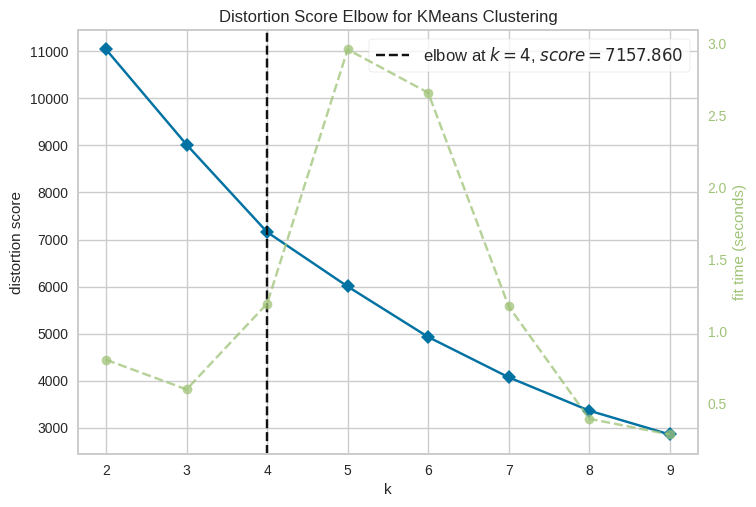

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, Silhouette Score: 0.3812697347217705
For n_clusters=2, Davies-Bouldin Score: 1.243737392330997
For n_clusters=2, Calinski-Harabasz Index: 1353.6135252021995


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, Silhouette Score: 0.38329956059412174
For n_clusters=3, Davies-Bouldin Score: 0.8315771301496762
For n_clusters=3, Calinski-Harabasz Index: 1249.4697734922142


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, Silhouette Score: 0.3856080571196028
For n_clusters=4, Davies-Bouldin Score: 0.9129302680010247
For n_clusters=4, Calinski-Harabasz Index: 1339.2691599048771


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, Silhouette Score: 0.38612756045825253
For n_clusters=5, Davies-Bouldin Score: 0.8022981956938002
For n_clusters=5, Calinski-Harabasz Index: 1406.688872169037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, Silhouette Score: 0.34663346308028276
For n_clusters=6, Davies-Bouldin Score: 0.8590438004242641
For n_clusters=6, Calinski-Harabasz Index: 1535.0199923939863


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, Silhouette Score: 0.34767112519835797
For n_clusters=7, Davies-Bouldin Score: 0.8640696728468814
For n_clusters=7, Calinski-Harabasz Index: 1678.8496862350096


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, Silhouette Score: 0.412259384446904
For n_clusters=8, Davies-Bouldin Score: 0.7691905990614224
For n_clusters=8, Calinski-Harabasz Index: 1854.6845079186655


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, Silhouette Score: 0.4493898086312987
For n_clusters=9, Davies-Bouldin Score: 0.692826692872444
For n_clusters=9, Calinski-Harabasz Index: 1993.4912771412519


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, Silhouette Score: 0.4683562992629704
For n_clusters=10, Davies-Bouldin Score: 0.6854406291220602
For n_clusters=10, Calinski-Harabasz Index: 2065.6294951368614


In [33]:
#Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer

# Загрузите данные и предварительно обработайте их (если необходимо)
df = pd.read_csv('ds_salaries.csv')
df_cluster = df.copy()

# Игнорирование категориальных столбцов (предполагая, что они не используются)
df_cluster = df_cluster.select_dtypes(include=[np.number])

# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_features = df_cluster.columns
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

# Выбор числа кластеров с использованием метода локтя (Elbow Method)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
visualizer.fit(df_cluster)
visualizer.show()

# Использование других метрик для оценки качества кластеризации
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)

    # Silhouette Score
    silhouette_avg = silhouette_score(df_cluster, kmeans.labels_)
    print(f"For n_clusters={k}, Silhouette Score: {silhouette_avg}")

    # Davies-Bouldin Score
    davies_bouldin = davies_bouldin_score(df_cluster, kmeans.labels_)
    print(f"For n_clusters={k}, Davies-Bouldin Score: {davies_bouldin}")

    # Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(df_cluster, kmeans.labels_)
    print(f"For n_clusters={k}, Calinski-Harabasz Index: {calinski_harabasz}")



Данный код выполняет кластеризацию методом k-means, а затем оценивает качество кластеризации с использованием нескольких метрик. Вот разбор кода:

Импортируются необходимые библиотеки, включая pandas для работы с данными, numpy для работы с числовыми данными, KMeans из scikit-learn для кластеризации, StandardScaler для масштабирования числовых признаков и несколько метрик оценки качества кластеризации.

Данные загружаются из CSV-файла и выполняется предварительная обработка. В данном случае предполагается, что используются только числовые признаки, и все остальные столбцы игнорируются.

Числовые признаки масштабируются с использованием StandardScaler.

Для выбора оптимального числа кластеров используется метод локтя с помощью библиотеки Yellowbrick. Визуализируется зависимость искажения (distortion) от числа кластеров.

Затем выполняется кластеризация для различного числа кластеров (от 2 до 10), и оценивается качество с использованием трех метрик: Silhouette Score, Davies-Bouldin Score и Calinski-Harabasz Index.

Результаты выводятся на экран, предоставляя информацию о качестве кластеризации для различного числа кластеров.

Этот код позволяет визуально определить оптимальное количество кластеров с использованием метода локтя и предоставляет численные метрики для оценки качества кластеризации.






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


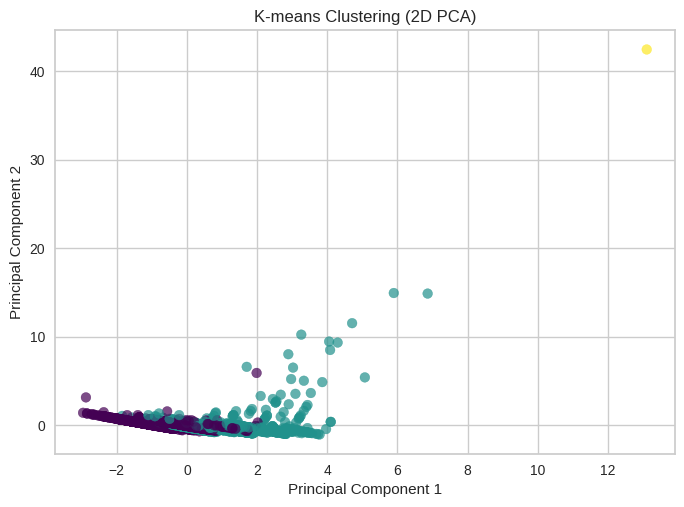

In [35]:
#визуализация кластеров k-means
#(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
#Импорт библиотек： Импортируются необходимые библиотеки, включая pandas для работы с данными, numpy для математических операций, matplotlib.pyplot для визуализации данных, KMeans для кластеризации, StandardScaler для масштабирования числовых признаков и PCA для сжатия размерности.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузите данные и предварительно обработайте их (если необходимо)
df = pd.read_csv('ds_salaries.csv')
df_cluster = df.copy()

# Игнорирование категориальных столбцов (предполагая, что они не используются)
df_cluster = df_cluster.select_dtypes(include=[np.number])#Предварительная обработка данных: Предполагается, что в данном случае используются только числовые признаки, и остальные столбцы игнорируются.

# Масштабирование числовых признаков
scaler = StandardScaler()#Масштабирование числовых признаков: Числовые признаки масштабируются с использованием StandardScaler.
numeric_features = df_cluster.columns
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

# Применение K-means
kmeans = KMeans(n_clusters=3, random_state=42)#Применение k-means: Метод k-means применяется с указанием трех кластеров, и прогнозируемые метки кластеров добавляются в датафрейм.
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)

# Сжатие размерности с использованием PCA
pca = PCA(n_components=2)#Сжатие размерности с использованием PCA: Применяется метод главных компонент для снижения размерности данных до двух компонент.
data_2d = pca.fit_transform(df_cluster[numeric_features])

# Визуализация кластеров в 2D
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df_cluster['cluster'], cmap='viridis', alpha=0.7)#Визуализация кластеров в 2D: Визуализируются кластеры на двумерном графике, где каждая точка представляет объект, окрашенный в соответствии с прогнозируемым кластером.
plt.title('K-means Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Этот график помогает визуализировать, как объекты распределяются по кластерам в двумерном пространстве после применения метода k-means и сжатия размерности методом PCA.

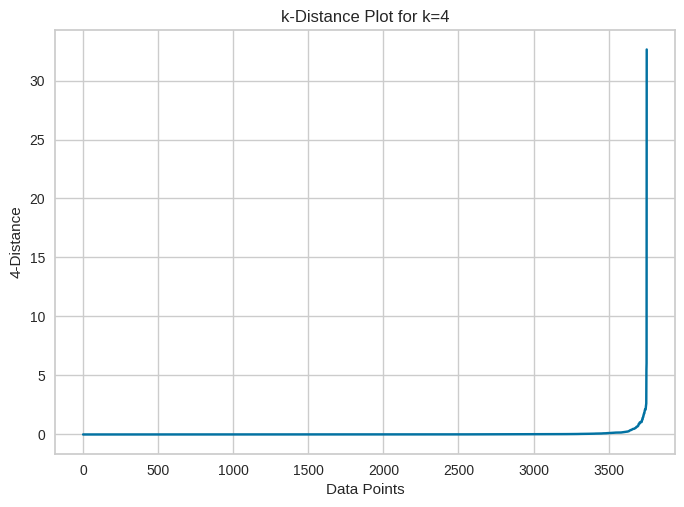

In [37]:
# DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Загрузите данные и предварительно обработайте их (если необходимо)
df = pd.read_csv('ds_salaries.csv')
df_cluster = df.copy()

# Игнорирование категориальных столбцов (предполагая, что они не используются)
df_cluster = df_cluster.select_dtypes(include=[np.number])#

# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_features = df_cluster.columns
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

# Вычисление расстояний до k-го ближайшего соседа
k = 4  # Задайте желаемое количество ближайших соседей
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df_cluster)

distances, indices = neigh.kneighbors(df_cluster)

# Сортировка расстояний и визуализация k-расстояний
distances = np.sort(distances[:, -1])#Сортировка и визуализация k-расстояний:Расстояния сортируются, и строится график k-расстояний.
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel(f'{k}-Distance')
plt.title(f'k-Distance Plot for k={k}')#K-расстояния позволяют определить подходящее значение eps для DBSCAN — расстояние, где график начинает резко возрастать, указывает на изменение плотности данных.
plt.show()


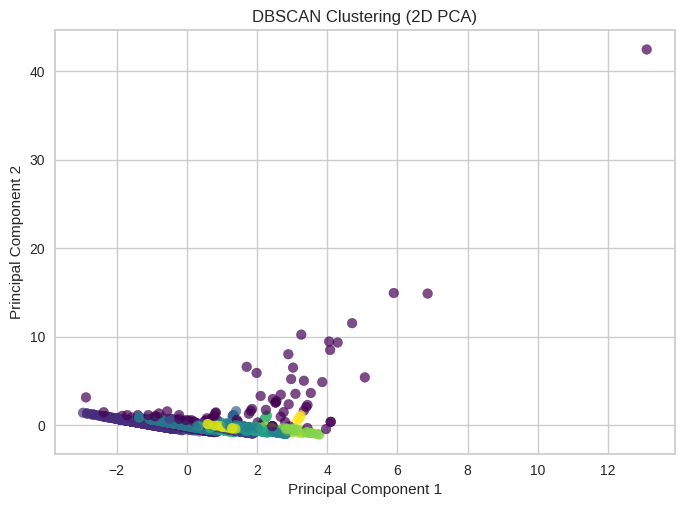

In [38]:
#визуализация кластеров DBSCAN
#(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузите данные и предварительно обработайте их (если необходимо)
df = pd.read_csv('ds_salaries.csv')
df_cluster = df.copy()

# Игнорирование категориальных столбцов (предполагая, что они не используются)
# Предварительная обработка данных:
df_cluster = df_cluster.select_dtypes(include=[np.number])

# Масштабирование числовых признаков
scaler = StandardScaler()#Числовые признаки масштабируются с использованием StandardScaler.
numeric_features = df_cluster.columns
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)#DBSCAN применяется к предобработанным данным с заданными параметрами eps и min_samples.
df_cluster['cluster'] = dbscan.fit_predict(df_cluster)#Результаты кластеризации добавляются в столбец 'cluster' в DataFrame

# Сжатие размерности с использованием PCA
pca = PCA(n_components=2)#PCA используется для сжатия размерности до двух компонент.
data_2d = pca.fit_transform(df_cluster[numeric_features])

# Визуализация кластеров в 2D
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df_cluster['cluster'], cmap='viridis', alpha=0.7)#Визуализация кластеров в двумерном пространстве с использованием цветовой схемы 'viridis'.
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



Этот график позволяет визуально оценить результаты кластеризации методом DBSCAN в двумерном пространстве после использования PCA. Каждый кластер представлен уникальным цветом.

Cophenetic Correlation Coefficient: 0.452159584403309


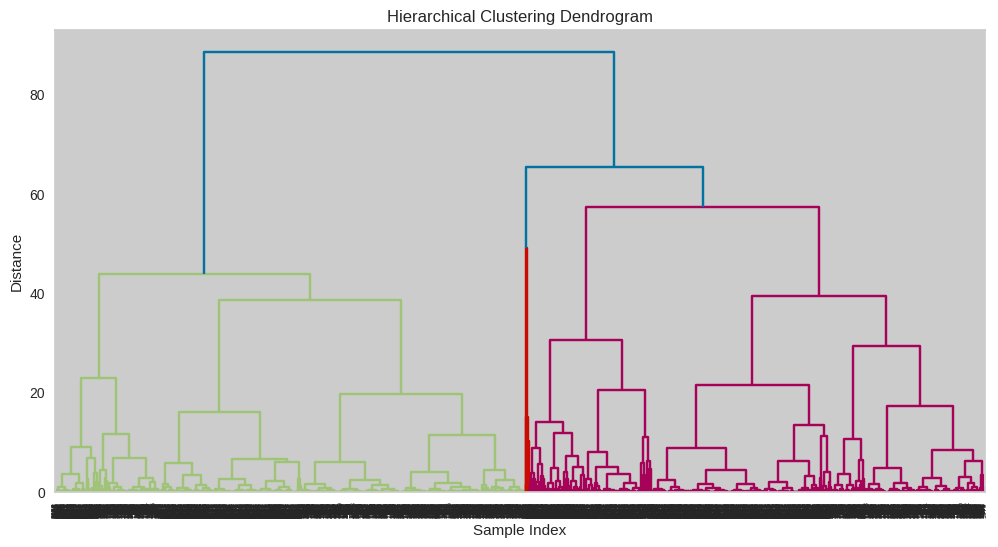

In [40]:
#Здесь иерархическая кластеризация и метрики
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage  # Добавлен импорт linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Загрузите данные и предварительно обработайте их (если необходимо)
df = pd.read_csv('ds_salaries.csv')#Импортируются необходимые библиотеки, включая pandas для работы с данными, numpy для математических операций, AgglomerativeClustering для иерархической кластеризации, dendrogram для построения дендрограммы, cophenet и linkage для вычисления cophenetic correlation coefficient, pdist для вычисления парных расстояний и matplotlib.pyplot для визуализации данных.
df_cluster = df.copy()

# Игнорирование категориальных столбцов (предполагая, что они не используются)
df_cluster = df_cluster.select_dtypes(include=[np.number])

# Масштабирование числовых признаков
scaler = StandardScaler()#Предполагается, что в данном случае используются только числовые признаки, и остальные столбцы игнорируются.
numeric_features = df_cluster.columns
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

# Применение иерархической кластеризации
model = AgglomerativeClustering(n_clusters=3)#Иерархическая кластеризация применяется к предобработанным данным с заданным числом кластеров.
df_cluster['cluster'] = model.fit_predict(df_cluster)#Результаты кластеризации добавляются в столбец 'cluster' в DataFrame.

# Вычисление cophenetic correlation coefficient
linkage_matrix = linkage(df_cluster[numeric_features], 'ward')
coph_corr, coph_dist = cophenet(linkage_matrix, pdist(df_cluster[numeric_features]))

print(f'Cophenetic Correlation Coefficient: {coph_corr}')

# Визуализация дендрограммы
plt.figure(figsize=(12, 6))#Строится и визуализируется дендрограмма, представляющая иерархическую структуру кластеров.
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Этот график дендрограммы помогает визуализировать структуру иерархической кластеризации и отношения между кластерами.







In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

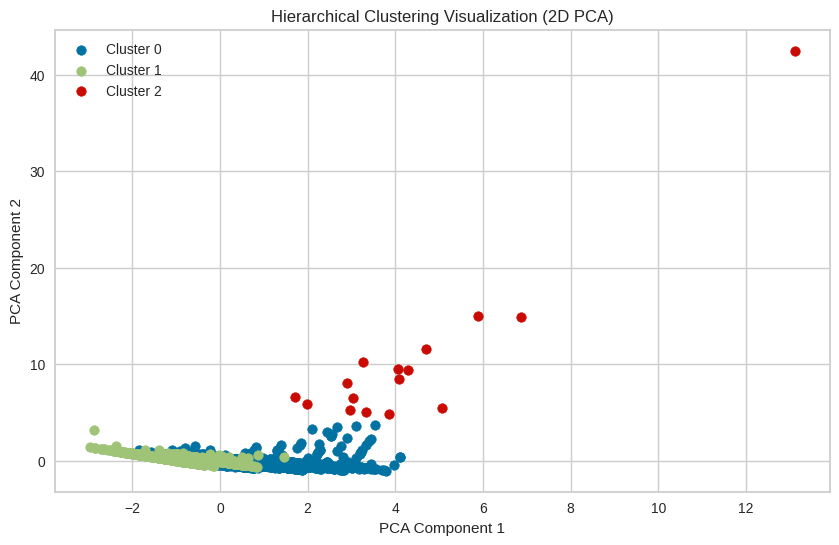

In [41]:
#Здесь визуализация кластеров иерархической кластеризации
#(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Загрузите данные и предварительно обработайте их (если необходимо)
df = pd.read_csv('ds_salaries.csv')
df_cluster = df.copy()

# Игнорирование категориальных столбцов (предполагая, что они не используются)
df_cluster = df_cluster.select_dtypes(include=[np.number])

# Масштабирование числовых признаков
scaler = StandardScaler()
numeric_features = df_cluster.columns
df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

# Применение иерархической кластеризации
model = AgglomerativeClustering(n_clusters=3)
df_cluster['cluster'] = model.fit_predict(df_cluster)

# Применение PCA для сжатия данных до двух компонент
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cluster[numeric_features])

# Добавление результатов PCA в DataFrame
df_cluster['pca1'] = pca_result[:, 0]
df_cluster['pca2'] = pca_result[:, 1]

# Визуализация кластеров в двумерном пространстве
#Кластеры визуализируются на плоскости, где каждая точка представляет собой объект данных, а цвета обозначают принадлежность кластеру.
plt.figure(figsize=(10, 6))
for cluster in df_cluster['cluster'].unique():
    cluster_data = df_cluster[df_cluster['cluster'] == cluster]
    plt.scatter(cluster_data['pca1'], cluster_data['pca2'], label=f'Cluster {cluster}')

plt.title('Hierarchical Clustering Visualization (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [46]:
!pip install ydata-profiling
!pip install typing-extensions==3.10.0.0
!pip install typing-extensions==3.10.0.0


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sqlalchemy 2.0.23 requires typing-extensions>=4.2.0, but you have typing-extensions 3.10.0.0 which is incompatible.
arviz 0.15.1 requires typing-extensions>=4.1.0, but you have typing-extensions 3.10.0.0 which is incompatible.
chex 0.1.7 requires typing-extensions>=4.2.0; python_version < "3.11", but you have typing-extensions 3.10.0.0 which is incompatible.
flax 0.7.5 requires typing-extensions>=4.2, but you have typing-extensions 3.10.0.0 which is incompatible.
ibis-framework 6.2.0 requires typing-extensions<5,>=4.3.0, but you have typing-extensions 3.10.0.0 which is incompatible.
librosa 0.10.1 requires typing-extensio

In [53]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler



# Предположим, что df_cluster - это ваш DataFrame после предварительной обработки и оптимизации
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[numeric_features])

# K-means
kmeans_model = KMeans(n_clusters=3)  # Замените на ваше оптимальное количество кластеров
df['kmeans_cluster'] = kmeans_model.fit_predict(df_scaled)

# DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Замените параметры на ваши
df['dbscan_cluster'] = dbscan_model.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [54]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()


'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

In [62]:
from scipy.stats import ttest_ind

# Assuming 'dbscan_labels' is the correct column name
# If not, replace 'dbscan_labels' with the actual column name

# Check if the column exists in the DataFrame
if 'dbscan_labels' in df.columns:
    # Getting data for each cluster
    cluster_0_age = df[df['dbscan_labels'] == 0]['Age']
    cluster_1_age = df[df['dbscan_labels'] == 1]['Age']
    cluster_2_age = df[df['dbscan_labels'] == 2]['Age']

    # Comparing the mean age between clusters
    t_statistic_01, p_value_01 = ttest_ind(cluster_0_age, cluster_1_age)
    t_statistic_02, p_value_02 = ttest_ind(cluster_0_age, cluster_2_age)
    t_statistic_12, p_value_12 = ttest_ind(cluster_1_age, cluster_2_age)

    # Displaying the results
    print(f'T-Statistic (0 vs 1): {t_statistic_01}, P-Value: {p_value_01}')
    print(f'T-Statistic (0 vs 2): {t_statistic_02}, P-Value: {p_value_02}')
    print(f'T-Statistic (1 vs 2): {t_statistic_12}, P-Value: {p_value_12}')
else:
    print("The 'dbscan_labels' column does not exist in the DataFrame.")


The 'dbscan_labels' column does not exist in the DataFrame.


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dbscan_labels' is the correct column name
# If not, replace 'dbscan_labels' with the actual column name

# Check if the column exists in the DataFrame
if 'dbscan_labels' in df.columns:
    # Create a box plot
    sns.boxplot(x='dbscan_labels', y='Age', data=df)
    plt.title('Distribution of Age across DBSCAN Clusters')
    plt.show()
else:
    print("The 'dbscan_labels' column does not exist in the DataFrame.")



The 'dbscan_labels' column does not exist in the DataFrame.
